In [11]:
# all imports
import numpy as np
import os
import requests
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
import math
import matplotlib as mpl
from astropy.visualization.wcsaxes import SphericalCircle
import pandas as pd
import random
from matplotlib.patches import Ellipse

In [12]:
# define directories
data_dir = '/global/cfs/projectdirs/desi/science/td/pv/tfgalaxies/'
cache_dir = '/pscratch/sd/j/jjpim/cache/' # my cache path
vi_dir = '/pscratch/sd/j/jjpim/visual_inspection/' # vi image path
v_dir = '/pscratch/sd/j/jjpim/2Dvmap/' # 2D velocity map image path

In [13]:
# load updated fuji table
tf_fuji = Table.read(data_dir + 'SV/desi_pv_tf_fuji_healpix_rotcurve_EOA_VI_velocity.fits') 
# load iron table
tf_iron = Table.read(data_dir + 'Y1/desi_pv_tf_iron_healpix_rotcurve_EOA_VI_velocity.fits')
#combine
tf_mastertable = vstack([tf_fuji,tf_iron])
#unique SGA IDs in rot curve galaxies
tf_galaxies = np.unique(tf_mastertable['SGA_ID'][tf_mastertable['ROT_CURVE']==1])
tf_mastertable_dict = {}
for sga_id in np.unique(tf_mastertable['SGA_ID'][tf_mastertable['ROT_CURVE']==1]):
    tf_mastertable_dict[sga_id] = np.where(tf_mastertable['SGA_ID'] == sga_id)[0]
tf_mastertable[:5]

TARGETID,TARGET_RA,TARGET_DEC,HEALPIX,SURVEY,Z,ZERR,ZWARN,DELTACHI2,FILENAME,PVTYPE,SGA_ID,RA,DEC,OBS_IN_SV,SKY_FIBER_DIST,SKY_FIBER_DIST_R26,ROT_CURVE,EOA,VELOCITY,VERR
int64,float64,float64,int64,bytes4,float64,float64,int64,float64,bytes65,bytes3,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1079550234591232,194.390863195343,27.5157211790145,10378,sv3,1.1235686466514,7.31685779475115e-05,4,3.28414569795132,fuji/healpix/sv3/bright/103/10378/redrock-sv3-bright-10378.fits,EXT,662902,194.39086319534337,27.51572117901454,1.0,0.03927420444753712,1.0000000170652443,0.0,0.0,--,inf
1092744374124544,194.390863195343,27.5157211790145,10378,sv3,0.686773088332363,6.9756676262104e-05,4,0.786607094109058,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.39086319534337,27.51572117901454,1.0,0.03927420444753712,1.0000000170652443,0.0,0.0,--,inf
1092744374124546,194.364461113654,27.5037185881314,10378,sv3,0.0242933923052181,4.95233472646785e-05,0,95.428411073226,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.36446111365385,27.50371858813136,1.0,0.012960487467698754,0.3300000056318236,0.0,0.0,--,inf
1092744369930240,194.338458724402,27.4918902690326,10378,sv3,0.0264170223697961,0.00010139452689994,0,9.53278421035066,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.33845872440244,27.491890269032595,1.0,0.012960487467685656,0.33000000563149007,0.0,0.0,--,inf
1092744374124545,194.377858465028,27.5098100780282,10378,sv3,0.211332646769145,6.68535116703737e-05,4,3.73989077657461,fuji/healpix/sv3/dark/103/10378/redrock-sv3-dark-10378.fits,EXT,662902,194.3778584650283,27.509810078028195,1.0,0.026313716979861984,0.6700000114340222,0.0,0.0,--,inf


In [14]:
# load SGA table
SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA_dict = {}
for i in range(len(SGA)):
    SGA_dict[SGA['SGA_ID'][i]] = i
SGA[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20181114,1,PGC1310416,1,True,202.54443750000002,6.9345944,0.4017908,

In [42]:
SGA[SGA_dict[19278]]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
19278,SGA-2020 19278,PGC3126144,3126144,210.861534,4.8727067,Sc,0.0,0.3672823,0.8298508,0.11573273,24.068481,17.615,False,LEDA-20181114,5121,PGC3126144,1,True,210.861534,4.8727067,0.3672823,2109p047,210.86152965279655,4.872664850752113,0.36748466,SB26,75.985825,0.9093934,210.86146598072204,4.8727262827561,8.931442,4.3242755,3.885962,3.6331453,2.910631,4.2416935,5.439149,6.484707,7.317044,8.098404,8.744415,9.827995,11.02454,18.652584,17.963514,17.477686,18.116934,17.503681,17.054377,17.798601,17.22936,16.810774,17.600037,17.06351,16.660404,17.496725,16.979336,16.584839,17.439474,16.934368,16.546831,17.410547,16.910692,16.52364,17.380362,16.88795,16.504614,17.356506,16.86826,16.485714,0.013094141,0.019535687,0.031035831,0.028730799,0.026915709,0.04561191,0.0622024,0.078370325,0.18266693,0.007105745,0.013422021,0.014666592,0.0057767327,0.0099421125,0.010990728,0.0059409533,0.008601285,0.009551697,0.005633983,0.007818268,0.00871493,0.0054957317,0.0074304775,0.008286663,0.0053528356,0.007229976,0.008211926,0.0053088805,0.0071272817,0.008083709,0.0052603506,0.007054229,0.008115024,0.005253433,0.007037806,0.008347183,17.341246,0.23725756,0.14521447,6.0341754,2.6464427,16.857706,0.20334649,0.1268947,6.0730515,0.8552115,16.475462,0.19264373,0.12751481,5.8724465,0.9991185,0


In [ ]:
#find sga id with certain amount of targets
for sga_id in tf_galaxies:
    if len(tf_mastertable[tf_mastertable['SGA_ID']==  sga_id])>10 and len(tf_mastertable[tf_mastertable['SGA_ID']==  sga_id])<12:
        print(sga_id)

In [36]:
tf_mastertable[tf_mastertable['SGA_ID']==  1049438]

TARGETID,TARGET_RA,TARGET_DEC,HEALPIX,SURVEY,Z,ZERR,ZWARN,DELTACHI2,FILENAME,PVTYPE,SGA_ID,RA,DEC,OBS_IN_SV,SKY_FIBER_DIST,SKY_FIBER_DIST_R26,ROT_CURVE,EOA,VELOCITY,VERR
int64,float64,float64,int64,bytes4,float64,float64,int64,float64,bytes65,bytes3,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1070193124048899,217.507245204422,3.20979181271875,26065,sv3,0.00595013217714784,1.31810421242316e-05,0,110.985633560224,fuji/healpix/sv3/bright/260/26065/redrock-sv3-bright-26065.fits,EXT,1049438,217.50724520442185,3.209791812718754,1.0,0.011149483959246398,0.32999998354529936,1.0,0.0,-55.70147117610238,4.075104528938938
1083387263582211,217.507245204422,3.20979181271875,26065,sv3,0.00595927789409536,1.57645207202069e-05,0,118.982941925147,fuji/healpix/sv3/dark/260/26065/redrock-sv3-dark-26065.fits,EXT,1049438,217.50724520442185,3.209791812718754,1.0,0.011149483959246398,0.32999998354529936,1.0,0.0,-52.95965421223313,4.829843672767951
1070193124048898,217.501605640616,3.23136818110745,26065,sv3,0.00636290142532162,6.82061778603048e-06,0,424.939328201232,fuji/healpix/sv3/bright/260/26065/redrock-sv3-bright-26065.fits,EXT,1049438,217.50160564061628,3.231368181107447,1.0,0.011149483959240047,0.3299999835451114,1.0,0.0,68.043636320727,2.274334938868318
1083387263582210,217.501605640616,3.23136818110745,26065,sv3,0.00636441889226084,7.15004993419948e-06,0,367.623233917635,fuji/healpix/sv3/dark/260/26065/redrock-sv3-dark-26065.fits,EXT,1049438,217.50160564061628,3.231368181107447,1.0,0.011149483959240047,0.3299999835451114,1.0,0.0,68.4985614643696,2.3635230771638875
1070193124048897,217.49870031729,3.24248326779518,26065,sv3,1.08064886152119,0.000130994611665261,4,3.34225494042039,fuji/healpix/sv3/bright/260/26065/redrock-sv3-bright-26065.fits,EXT,1049438,217.49870031728966,3.2424832677951803,1.0,0.02263683106875782,0.6699999665915225,1.0,0.0,322130.87220835104,39.283818547088345
1083387263582209,217.49870031729,3.24248326779518,26065,sv3,1.04893751218688,6.6759442175167e-05,4,1.9588427990675,fuji/healpix/sv3/dark/260/26065/redrock-sv3-dark-26065.fits,EXT,1049438,217.49870031728966,3.2424832677951803,1.0,0.02263683106875782,0.6699999665915225,1.0,0.0,312624.0488449216,20.038732543181094
1083387263582212,217.5101503412,3.19867670172824,26065,sv3,1.66119312189572,0.000201645048901575,4,4.33143296092749,fuji/healpix/sv3/dark/260/26065/redrock-sv3-dark-26065.fits,EXT,1049438,217.51015034120007,3.198676701728241,1.0,0.0226368310687732,0.6699999665919777,1.0,0.0,496173.6630038234,60.459865196552
1083387263582212,217.5101503412,3.19867670172824,26065,sv3,1.66119312189572,0.000201645048901575,4,4.33143296092749,fuji/healpix/sv3/dark/260/26065/redrock-sv3-dark-26065.fits,TFT,1049438,217.51015034120007,3.198676701728241,1.0,0.0226368310687732,0.6699999665919777,1.0,0.0,496173.6630038234,60.459865196552
1070193124048897,217.49870031729,3.24248326779518,26065,sv3,1.08064886152119,0.000130994611665261,4,3.34225494042039,fuji/healpix/sv3/bright/260/26065/redrock-sv3-bright-26065.fits,TFT,1049438,217.49870031728966,3.24248326779518,1.0,0.022636831068757433,0.6699999665915111,1.0,0.0,322130.87220835104,39.283818547088345


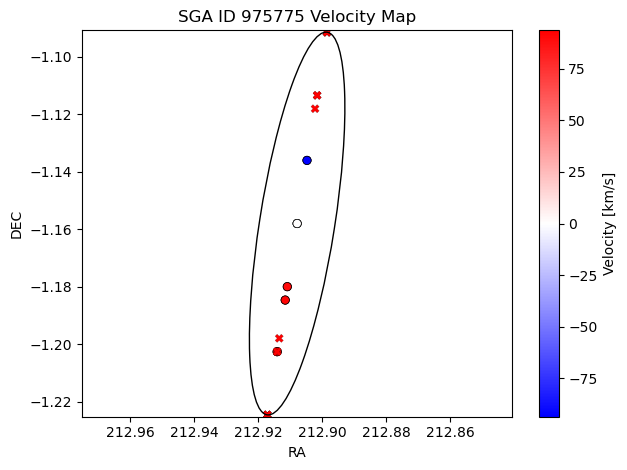

In [39]:
#plotting with ellipse (set up for one sga id at a time- next need to do for all)
sga_id = 975775
plt.figure(tight_layout=True)
#define plotting variables
galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == sga_id]
c = galaxy['VELOCITY']

# find max of absolute value of the leftover velocities
velocity_abs = np.abs(c)
v_max = np.max(velocity_abs)

# separate the data into velocity types
high_velocity = galaxy[np.abs(c) > 1000]
low_velocity = galaxy[np.abs(c) <= 1000]

if len(low_velocity) > 0:
    first_low_velocity = low_velocity['VELOCITY'][0]
    vmin = -np.abs(first_low_velocity)
    vmax = np.abs(first_low_velocity)
else:
    # if there are no low velocity data points set range as -1000 to 1000
    vmin = -1000 if v_max > 1000 else -v_max
    vmax = 1000 if v_max > 1000 else v_max
    
'''
#define colorbar
if v_max > 1000:
    vmin = -1000
    vmax = 1000
else:
    vmin = -v_max
    vmax = +v_max
'''
plt.scatter(low_velocity['RA'], low_velocity['DEC'], c=low_velocity['VELOCITY'], marker='o', cmap='bwr', linewidths=0.5, edgecolors='black', vmin=vmin, vmax=vmax)
plt.scatter(high_velocity['RA'], high_velocity['DEC'], c=high_velocity['VELOCITY'], marker='X', cmap='bwr', linewidths=0.1, edgecolors='black', vmin=vmin, vmax=vmax)

# plot scatter plot
plt.colorbar(label='Velocity [km/s]')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('SGA ID {} Velocity Map'.format(galaxy['SGA_ID'][0]))

#set up to plot ellipse
ax = plt.gca()

#ellipse center and position angle (degrees)
x_center = SGA['RA'][SGA_dict[sga_id]]
y_center = SGA['DEC'][SGA_dict[sga_id]]
theta = SGA['PA'][SGA_dict[sga_id]]

#put major and minor axis into degrees
maj = SGA['D26'][SGA_dict[sga_id]]
major = maj/60
ratio = SGA['BA'][SGA_dict[sga_id]]
minor = major*ratio

#plot ellipse
ell = Ellipse(
    xy = (x_center, y_center),
    width = minor,
    height = major,
    angle =(180 - theta), #accounts for differences between matplotlib and legacy survey units
    edgecolor = 'black',
    facecolor = 'none'
)
ax.add_artist(ell)

# invert x-axis
#ax.invert_xaxis()

#find target min and max
ra = galaxy['RA']
dec = galaxy['DEC']
max_dec = np.max(dec)
min_dec = np.min(dec)
max_ra = np.max(ra)
min_ra = np.min(ra)

#set up fractions of min/max to add onto axis limits
'''
dec_frac_max = np.abs(max_dec*0.004)
dec_frac_min = np.abs(min_dec*0.002)
ra_frac = np.abs(max_ra*0.0003)

dec_frac = np.abs(max_dec - min_dec)*0.1
ra_frac = np.abs(max_ra - min_ra)*0.1
'''
'''
#set axis manually
dec_max = (max_dec + dec_frac)
dec_min = (min_dec - dec_frac)
ra_max =  (max_ra + ra_frac)
ra_min = (min_ra - ra_frac)
'''
dec_max = y_center + major*0.5
ra_max = x_center + major*0.5
dec_min = y_center - major*0.5
ra_min = x_center - major*0.5
'''
#set axis manually
ax.set_xlim(213, 212.83)
ax.set_ylim(-1.23, -1.09)

'''
ax.set_xlim(ra_max, ra_min)
ax.set_ylim(dec_min, dec_max)

# either load an existing image or save fig to scratch
img_name = v_dir + '{}.jpg'.format(sga_id)
plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
'''if os.path.exists(img_name):
    if verbose:
        print('{} exists.'.format(img_name))
else:
    plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
'''
plt.show()

In [22]:
theta

142.01385

In [ ]:
for sga_id in tf_galaxies:
    plt.figure(tight_layout=True)
    ax = plt.gca()
    #define plotting variables
    galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == sga_id]
    c = galaxy['VELOCITY']

    # find max of absolute value of the leftover velocities
    velocity_abs = np.abs(c)
    v_max = np.max(velocity_abs)

    # separate the data into velocity types
    high_velocity = galaxy[np.abs(c) > 1000]
    low_velocity = galaxy[np.abs(c) <= 1000]

    if len(low_velocity) > 0:
        first_low_velocity = low_velocity['VELOCITY'][0]
        vmin = -np.abs(first_low_velocity)
        vmax = np.abs(first_low_velocity)
    else:
        # if there are no low velocity data points set range as -1000 to 1000
        vmin = -1000 if v_max > 1000 else -v_max
        vmax = 1000 if v_max > 1000 else v_max
    
    '''
    #define colorbar
    if v_max > 1000:
        vmin = -1000
        vmax = 1000
    else:
        vmin = -v_max
        vmax = +v_max
    '''
    #plot scatter plot
    plt.scatter(low_velocity['RA'], low_velocity['DEC'], c=low_velocity['VELOCITY'], marker='o', cmap='bwr', linewidths=0.5, edgecolors='black', vmin=vmin, vmax=vmax)
    plt.scatter(high_velocity['RA'], high_velocity['DEC'], c=high_velocity['VELOCITY'], marker='X', cmap='bwr', linewidths=0.1, edgecolors='black', vmin=vmin, vmax=vmax)

    # plot w/ color bar
    plt.colorbar(label='Velocity [km/s]')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('SGA ID {} Velocity Map'.format(galaxy['SGA_ID'][0]))

    #ellipse center and position angle (degrees)
    x_center = SGA['RA'][SGA_dict[sga_id]]
    y_center = SGA['DEC'][SGA_dict[sga_id]]
    theta = SGA['PA'][SGA_dict[sga_id]]

    #put major and minor axis into degrees
    maj = SGA['D26'][SGA_dict[sga_id]]
    major = maj/60
    ratio = SGA['BA'][SGA_dict[sga_id]]
    minor = major*ratio

    #plot ellipse
    ell = Ellipse(
        xy = (x_center, y_center),
        width = minor,
        height = major,
        angle =(180 - theta), #accounts for differences between matplotlib and legacy survey units
        edgecolor = 'black',
        facecolor = 'none'
    )
    ax.add_artist(ell)
    '''
    invert x-axis
    ax.invert_xaxis()
    '''
    #find target min and max
    ra = galaxy['RA']
    dec = galaxy['DEC']
    max_dec = np.max(dec)
    min_dec = np.min(dec)
    max_ra = np.max(ra)
    min_ra = np.min(ra)

    #set up axis limits
    dec_max = y_center + major*0.5
    ra_max = x_center + major*0.5
    dec_min = y_center - major*0.5
    ra_min = x_center - major*0.5

    ax.set_xlim(ra_max, ra_min)
    ax.set_ylim(dec_min, dec_max)

    # save fig to scratch
    img_name = v_dir + '{}.jpg'.format(sga_id)
    plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
    # either load existing image or save fig to scratch
    '''
    if os.path.exists(img_name):
    if verbose:
        print('{} exists.'.format(img_name))
    else:
        plt.savefig(v_dir + '{}.png'.format(sga_id), dpi=120)
    '''
    #plt.show()